### Importação dos dados



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

In [8]:
# Verificar valores nulos
loja.info()
loja2.info()
loja3.info()
loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

In [9]:
# Remover valores nulos (aplicado a todas as lojas por precaução e consistência)
loja.dropna(inplace=True)
loja2.dropna(inplace=True)
loja3.dropna(inplace=True)
loja4.dropna(inplace=True)

#1. Análise do faturamento


In [10]:
# Faturamento de cada loja
FL1 = loja['Preço'].sum()
FL2 = loja2['Preço'].sum()
FL3 = loja3['Preço'].sum()
FL4 = loja4['Preço'].sum()

# Resultados dos calculos
print(f"Faturamento Loja 1: R$ {FL1:,.2f}")
print(f"Faturamento Loja 2: R$ {FL2:,.2f}")
print(f"Faturamento Loja 3: R$ {FL3:,.2f}")
print(f"Faturamento Loja 4: R$ {FL4:,.2f}")

Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


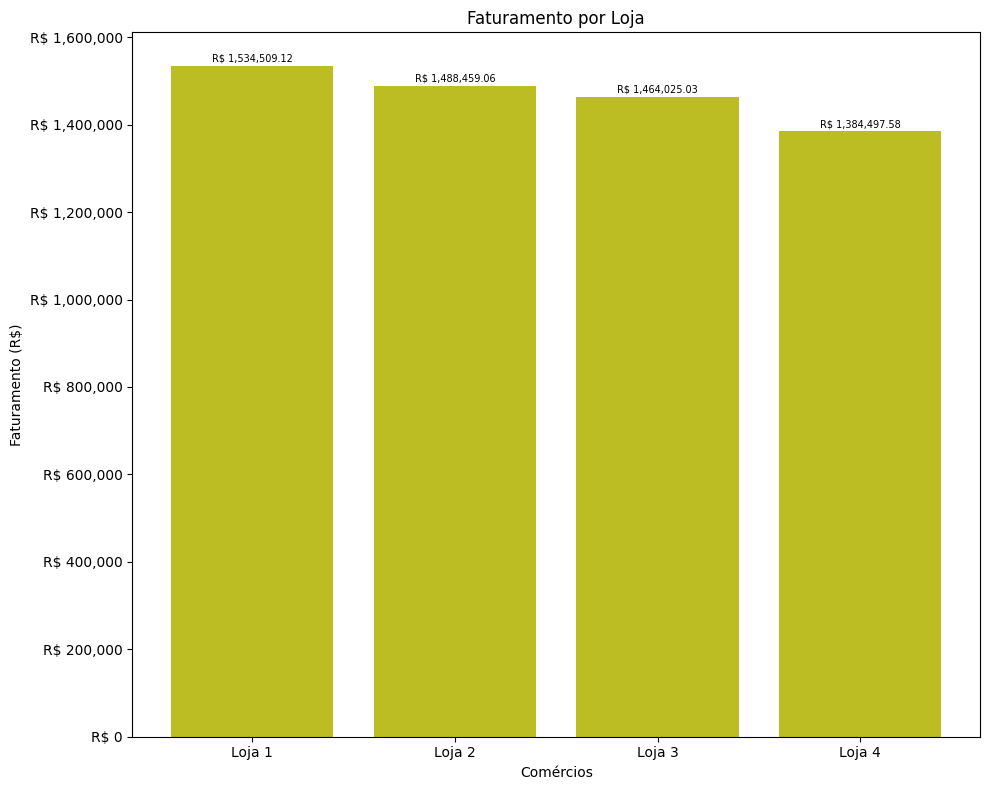

In [11]:
# Dados de faturamento por loja
Lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
Faturamento = [FL1, FL2, FL3, FL4]

# Criando DataFrame de faturamento
df_faturamento = pd.DataFrame({'Loja': Lojas, 'Faturamento': Faturamento})

# Gráfico de faturamento por loja
plt.figure(figsize=(10, 8))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='#bcbd22')

# Título e Eixos
plt.title('Faturamento por Loja')
plt.xlabel('Comércios')
plt.ylabel('Faturamento (R$)')

# Formatação do eixo Y
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

# Mostrar valores em cima das barras
for i, valor in enumerate(df_faturamento['Faturamento']):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', fontsize=7)

# Ajusta o layout
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


Loja 1: Forte em móveis, eletrônicos e eletrodomésticos. Desempenho consistente. Fraquezas pontuais em livros e utilidades domésticas.

Loja 2: Destaques em livros e instrumentos musicais. Desempenho equilibrado. Possível foco em produtos culturais.

Loja 3: Melhor desempenho em móveis e eletrônicos. Perfil mais voltado a produtos de alto valor.

Loja 4: Menor desempenho em várias categorias, mas destaque em brinquedos e utilidades domésticas. Pode estar atendendo um público mais voltado ao lar e crianças.

In [12]:
# Lista de DataFrames correspondentes a cada loja
dataframes = [loja, loja2, loja3, loja4]

# Nomes das lojas para renomear colunas
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Para cada DataFrame, agrupa pela categoria do produto e conta os registros, renomeando a série
contagem_por_categoria = [
    df.groupby('Categoria do Produto').size().rename(nome)
    for df, nome in zip(dataframes, nomes_lojas)
]

# Concatena os resultados por coluna, preenche valores ausentes com zero e converte para inteiro
tabela_final = pd.concat(contagem_por_categoria, axis=1).fillna(0).astype(int)

# Exibe a tabela final
print(tabela_final)


                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


In [20]:
# Essa função compara cada valor com o máximo da coluna e retorna com uma cor
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

tabela_final.style.apply(highlight_max, axis=0)

Com a tabela acima torna-se percepitivel que ambas as lojas conseguem vender altos valores em relação ao produto "moveis", logo, deve ser o críterio de menor impacto na tomada de decisão, por todas as lojas venderem bem nesse quesito.

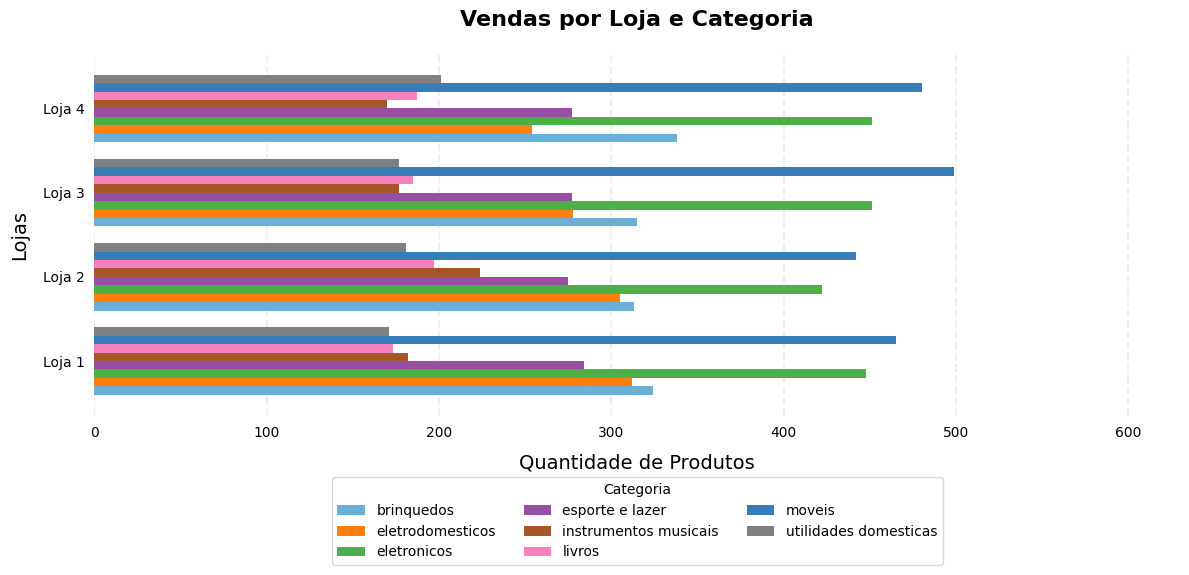

In [14]:
# Transpõe a tabela para ter lojas no eixo y
tabela_plot = tabela_final.T

# Define paleta de cores
cores = ['#6baed6', '#ff7f0e', '#4daf4a', '#984ea3',
         '#a65628', '#f781bf', '#377eb8', '#808080']

# Criando o gráfico
ax = tabela_plot.plot(
    kind='barh',
    figsize=(12, 6),
    color=cores[:tabela_plot.shape[1]],
    zorder=2,       # traz barras para frente
    width=0.8        # largura ajustada para estética
)

# Remove bordas desnecessárias
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Desativa ticks em ambas direções
ax.tick_params(axis="both", which="both",
               bottom=False, top=False,
               left=False, right=False,
               labelbottom=True, labelleft=True)

# Adiciona linhas de grade verticais suaves
for x in ax.get_xticks():
    ax.axvline(x=x, color='#eeeeee', linestyle='--', zorder=1)

# Formatação elegante do eixo x (ex: '1,000')
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Títulos e labels com estilo
ax.set_title('Vendas por Loja e Categoria',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quantidade de Produtos',
              fontsize=14, fontweight='medium', labelpad=10)
ax.set_ylabel('Lojas',
              fontsize=14, fontweight='medium', labelpad=10)

# Legenda bem posicionada
ax.legend(title='Categoria',
          bbox_to_anchor=(0.5, -0.15),
          loc='upper center',
          ncol=3, fontsize=10)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [15]:
# Listas envolvendo DataFrames e seus nomes
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Gera um DataFrame com coluna "Loja" e sua média de avaliação
tabela_medias = (
    pd.DataFrame({
        'Loja': nomes,
        'Média Avaliação': [l['Avaliação da compra'].mean() for l in lojas]
    })
    .assign(**{'Média Avaliação': lambda df: df['Média Avaliação'].round(2)})
    .set_index('Loja')
)

# Exibe a tabela com a coloração de gradiente verde
tabela_medias.style.format("{:.2f}").background_gradient(cmap='Greens')

A Loja 3 lidera o ranking com a média mais alta (4,05), o que sugere um grau significativo de satisfação dos clientes — possivelmente refleto de uma qualidade superior nos produtos, uma experiência de compra bem-sucedida ou um atendimento eficiente.

Logo atrás, a Loja 2 com média de 4,04 demonstra também um desempenho de destaque — indicando uma operação equilibrada e possivelmente diferenciais competitivos, especialmente em categorias valorizadas culturalmente.

Apesar de apresentar uma média menor (4,00), a Loja 4 mantém um nível consistente de satisfação. Este resultado sugere que, mesmo que o volume de vendas possa não ser tão expressivo, o atendimento pode ser mais pessoal ou direcionado, o que conta como forte vantagem na experiência do cliente.

Por fim, a Loja 1 registra a avaliação mais baixa dentre as quatro (3,98), mas ainda assim dentro de parâmetros satisfatórios. Essa pontuação pode estar relacionada a pequenos pontos de falha em logística — como frete elevado — ou eventuais dificuldades no suporte pós-compra, mas ainda evidencia uma base sólida de boa experiência.

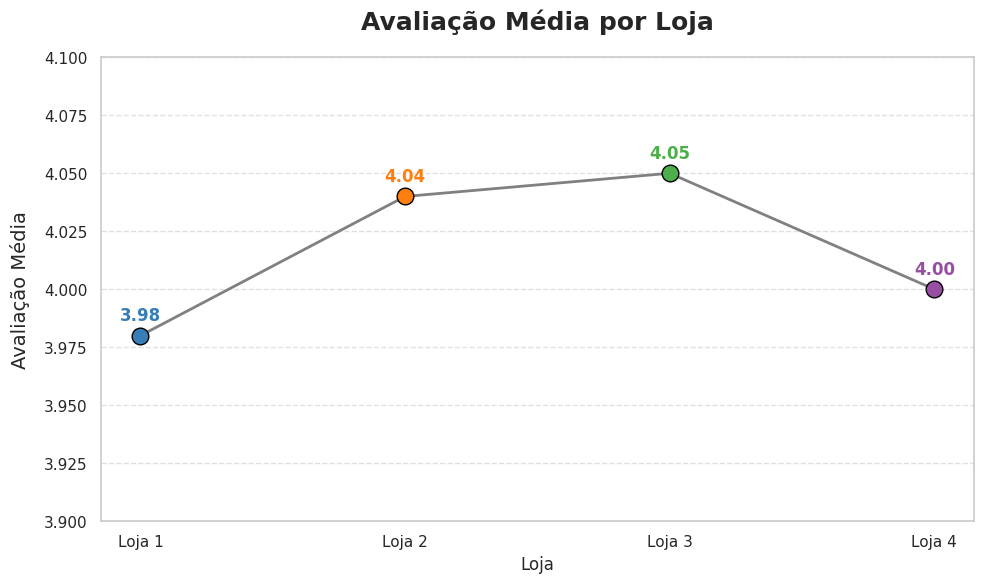

In [16]:
# Prepara os dados
df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Avaliação Média': [3.98, 4.04, 4.05, 4.00]
})

# Estilo clean e moderno
sns.set_theme(style='whitegrid')

# Cria o gráfico de linha com marcadores e cores personalizadas
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=df,
    x='Loja',
    y='Avaliação Média',
    marker='o',
    markersize=10,
    linewidth=2,
    color='gray'
)

# Destaca cada ponto com cor individual e anotação direta
paleta = ['#377eb8', '#ff7f0e', '#4daf4a', '#984ea3']
for idx, (loja, media) in enumerate(zip(df['Loja'], df['Avaliação Média'])):
    ax.plot(loja, media, marker='o', color=paleta[idx], markersize=12, markeredgecolor='black')
    ax.text(
        idx, media + 0.005, f"{media:.2f}",
        ha='center', va='bottom', fontsize=12, fontweight='bold', color=paleta[idx]
    )

# Títulos e ajustes visuais
ax.set_title('Avaliação Média por Loja', fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel('Avaliação Média', fontsize=14, labelpad=10)
ax.set_ylim(3.9, 4.1)

# Grade horizontal para facilitar leitura
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

**Loja 1**

**Produto mais vendido**: Móveis – 465 unidades.

**Produto menos vendido**: Utilidades domésticas – 171 unidades.

- O desempenho indica foco em itens de maior valor agregado, enquanto produtos de uso cotidiano apresentam menor rotatividade.
---

**Loja 2**

**Produto mais vendido**: Móveis – 442 unidades.

**Produto menos vendido**: Utilidades domésticas – 181 unidades.

- Perfil de vendas equilibrado, porém com menor procura por artigos de menor ticket médio.
---

**Loja 3**

**Produto mais vendido**: Móveis – 499 unidades.

**Produto menos vendido**: Instrumentos musicais – 177 unidades.

- Destaca-se pelo forte desempenho em categorias de alto valor, mas com baixa
demanda em segmentos mais específicos.

---

**Loja 4**

**Produto mais vendido**: Eletrônicos – 451 unidades.

**Produto menos vendido**: Instrumentos musicais – 170 unidades.

- Sobressai na venda de produtos tecnológicos, com menor interesse por itens de nicho.

---

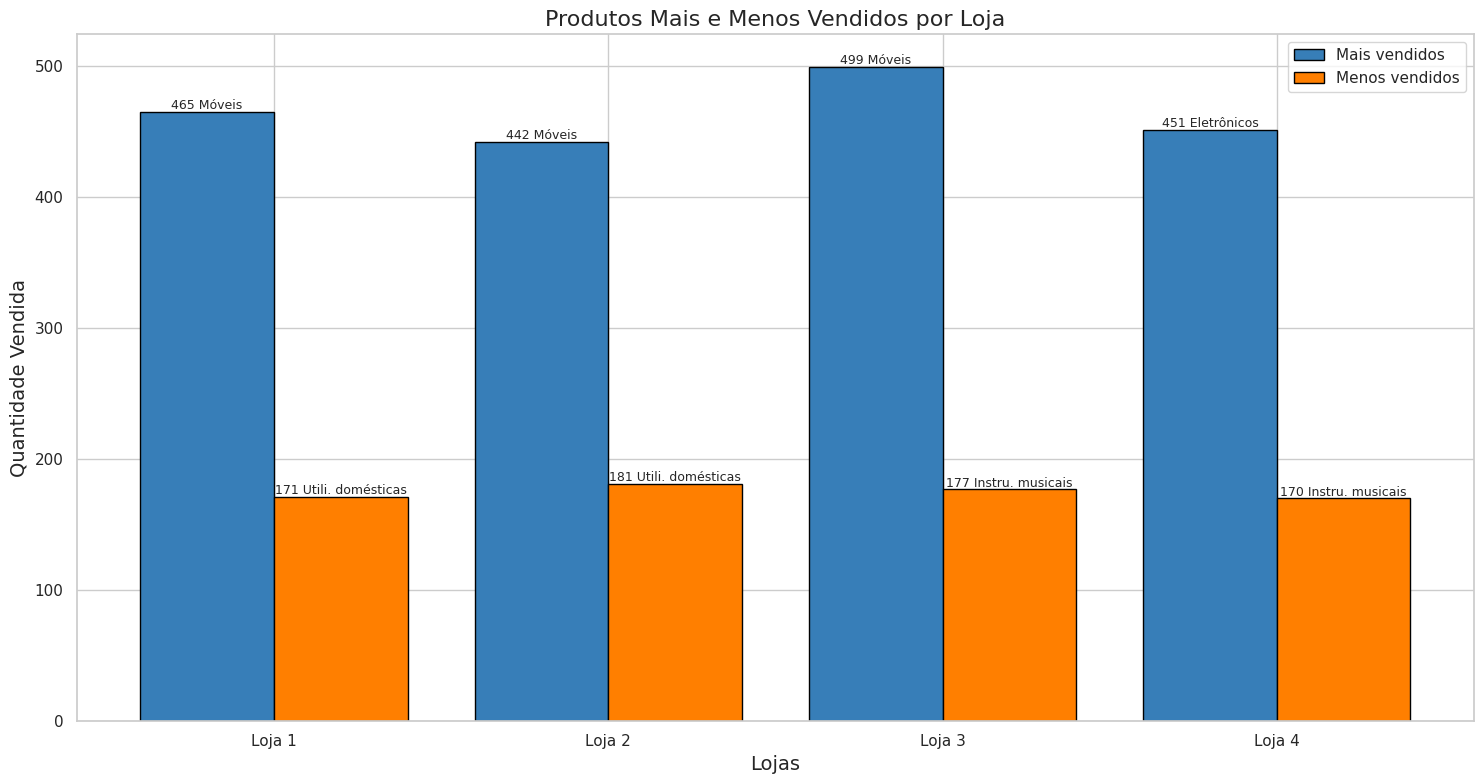

In [25]:
# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
mais_vendidos = [465, 442, 499, 451]
produtos_mais = ['Móveis', 'Móveis', 'Móveis', 'Eletrônicos']

menos_vendidos = [171, 181, 177, 170]
produtos_menos = ['Utili. domésticas', 'Utili. domésticas', 'Instru. musicais', 'Instru. musicais']

# Posição das barras
x = np.arange(len(lojas))
largura = 0.4

fig, ax = plt.subplots(figsize=(15, 8))

# Barras mais vendidos
barras1 = ax.bar(x - largura/2, mais_vendidos, largura, label='Mais vendidos', color='#377eb8', edgecolor='black')

# Barras menos vendidos
barras2 = ax.bar(x + largura/2, menos_vendidos, largura, label='Menos vendidos', color='#ff7f00', edgecolor='black')

# Rótulos acima das barras
for i in range(len(lojas)):
    ax.text(x[i] - largura/2, mais_vendidos[i] + 2, f"{mais_vendidos[i]} {produtos_mais[i]}",
            ha='center', fontsize=9)
    ax.text(x[i] + largura/2, menos_vendidos[i] + 2, f"{menos_vendidos[i]} {produtos_menos[i]}",
            ha='center', fontsize=9)

# Título e rótulos
ax.set_title('Produtos Mais e Menos Vendidos por Loja', fontsize=16)
ax.set_xlabel('Lojas', fontsize=14)
ax.set_ylabel('Quantidade Vendida', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.legend()

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


#Loja 1
Maior custo total e frete médio, indicando alto volume de pedidos, mas possível ineficiência logística ou vendas de menor ticket.

#Loja 2
Custos um pouco menores que a Loja 1, sugerindo volume similar e operação ligeiramente mais eficiente.

#Loja 3
Menor custo total e frete médio entre as três primeiras, sinalizando maior eficiência logística, possivelmente por melhor roteirização ou localização.

#Loja 4
Menor frete total e médio, mas também menor volume de vendas, indicando que o baixo custo vem da baixa movimentação, não necessariamente de eficiência.

In [29]:
# Calcular o custo médio de frete por loja
def calcular_frete(df, nome_loja):
    frete_total = df['Frete'].sum()
    frete_medio = df['Frete'].mean()
    return frete_total, frete_medio

# Calcular o frete total e a média de cada loja
frete_loja_total, frete_loja_medio = calcular_frete(loja, 'Loja')
frete_loja2_total, frete_loja2_medio = calcular_frete(loja2, 'Loja 2')
frete_loja3_total, frete_loja3_medio = calcular_frete(loja3, 'Loja 3')
frete_loja4_total, frete_loja4_medio = calcular_frete(loja4, 'Loja 4')

# Imprimir os resultados formatados
print(f"................Frete por Loja............................")
print(f"Loja 1: Frete Total = R$ {frete_loja_total:,.2f}, Frete Médio = R$ {frete_loja_medio:.2f}")
print(f"Loja 2: Frete Total = R$ {frete_loja2_total:,.2f}, Frete Médio = R$ {frete_loja2_medio:.2f}")
print(f"Loja 3: Frete Total = R$ {frete_loja3_total:,.2f}, Frete Médio = R$ {frete_loja3_medio:.2f}")
print(f"Loja 4: Frete Total = R$ {frete_loja4_total:,.2f}, Frete Médio = R$ {frete_loja4_medio:.2f}")

................Frete por Loja............................
Loja 1: Frete Total = R$ 81,837.97, Frete Médio = R$ 34.69
Loja 2: Frete Total = R$ 79,314.16, Frete Médio = R$ 33.62
Loja 3: Frete Total = R$ 78,022.66, Frete Médio = R$ 33.07
Loja 4: Frete Total = R$ 73,755.88, Frete Médio = R$ 31.28


**Mapa de Calor**

In [30]:
# Coordenadas das lojas com nomes
lojas = {
    'Loja 1': [(-23.55, -46.63), (-19.92, -43.94)],
    'Loja 2': [(-18.10, -44.38), (-22.25, -42.66), (-27.45, -50.95), (-30.17, -53.50), (-22.19, -48.79)],
    'Loja 3': [(-5.20, -39.53), (-30.17, -53.50), (-22.19, -48.79), (-13.29, -41.71), (-22.19, -48.79)],
    'Loja 4': [(-22.19, -48.79), (-15.98, -49.86), (-18.10, -44.38), (-18.10, -44.38), (-22.19, -48.79)]
}

# Cores definidas para cada loja
cores_lojas = {
    'Loja 1': 'red',
    'Loja 2': 'blue',
    'Loja 3': 'green',
    'Loja 4': 'orange'
}

# Criando o mapa centralizado no Brasil
mapa = folium.Map(location=[-22.19, -48.79], zoom_start=5)

# Adicionando marcadores com o número da loja
for nome_loja, coords in lojas.items():
    numero = nome_loja.split()[-1]
    cor = cores_lojas[nome_loja]
    for coord in coords:
        folium.Marker(
            location=coord,
            popup=nome_loja,
            icon=folium.DivIcon(html=f"""
                <div style="background-color:{cor};
                            color:white;
                            border-radius:50%;
                            width:24px;
                            height:24px;
                            text-align:center;
                            font-weight:bold;
                            line-height:24px;
                            border:2px solid white;">
                    {numero}
                </div>""")
        ).add_to(mapa)

mapa

#⭐ Conclusão – Recomendação de Venda

**Após análise dos indicadores de desempenho das quatro unidades da Alura Store — incluindo faturamento, custo médio de frete, satisfação do cliente, mix de produtos e presença geográfica — a recomendação é vender a Loja 4.**

#🔻 Motivos para a venda da Loja 4

- Menor faturamento entre as unidades, mesmo com volume de pedidos próximo das demais.

- Avaliações de clientes mais baixas, indicando menor satisfação.

- Frete médio elevado, sugerindo ineficiências logísticas.

- Sobreposição geográfica com outras lojas, sem ganho estratégico de cobertura.

- Baixa performance em categorias-chave de vendas.

#Por que manter as demais?

- Loja 1 – Alto faturamento, boa reputação e presença em mercados estratégicos como São Paulo e Belo Horizonte.

- Loja 2 – Equilíbrio entre custos logísticos e receita, com presença consolidada no Sul e Sudeste.

- Loja 3 – Faturamento elevado, atuação no Nordeste e Sudeste, boas avaliações e força em categorias estratégicas.

🎯 Conclusão Estratégica

**A venda da Loja 4 elimina um ponto de baixa rentabilidade e fraca relevância estratégica, liberando recursos para novos investimentos e fortalecimento das operações mais lucrativas.**